In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


# Importing Necessary Libraries

In [2]:
# Importing Tensorflow and keras
#Keras is built into TF 2.0

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

#Setting the Theme of the data visualizer Seaborn
sns.set(style="dark",context="notebook",palette="muted")


# Importing Dataset

In [3]:
train = pd.read_csv("../input/digit-recognizer/train.csv")
test = pd.read_csv("../input/digit-recognizer/test.csv")

# Data Processing 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

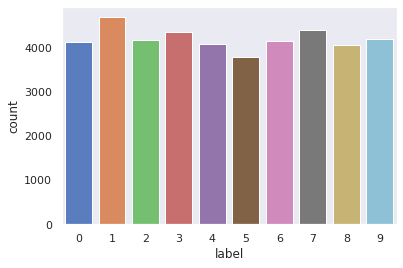

In [4]:
Y_train = train['label']

#Dropping Label Column
X_train = train.drop(labels=['label'],axis=1)

#free up some space
del train

graph = sns.countplot(Y_train)
 
Y_train.value_counts()


1. **Extracting Labels:**

   ```python
   Y_train = train['label']
   ```

   Here, `train` is a DataFrame containing the MNIST training data. The 'label' column represents the digit (0-9) that each image in the dataset corresponds to. This line extracts the labels from the 'label' column and stores them in `Y_train`.

2. **Dropping the Label Column:**

   ```python
   X_train = train.drop(labels=['label'],axis=1)
   ```

   This line removes the 'label' column from the `train` DataFrame, leaving only the pixel data of the images. `X_train` now contains only the feature data (pixel values) of the images, without the labels.

3. **Freeing Up Memory:**

   ```python
   del train
   ```

   This line deletes the `train` DataFrame to free up some memory. After extracting the labels and features, the original `train` DataFrame is no longer needed, so it is removed from memory.

4. **Visualizing the Distribution of Labels:**

   ```python
   graph = sns.countplot(Y_train)
   ```

   This line uses Seaborn to create a count plot of the `Y_train` labels. This helps visualize the distribution of different digits (0-9) in the training set. 

5. **Counting the Occurrences of Each Label:**

   ```python
   Y_train.value_counts()
   ```

   This line counts the occurrences of each digit in the `Y_train` labels. It returns a Series with the counts of each unique label value, which helps to verify the balance of the dataset.

### Context in Building a CNN Model

In the context of building a CNN model for the MNIST dataset, these steps are part of the data preprocessing stage. 

- **Extracting and Separating Data:** The first two steps ensure that the labels (target variable) and the pixel values (features) are separated for further processing.
- **Freeing Memory:** The deletion of the original DataFrame helps manage memory usage, which can be crucial when working with large datasets.
- **Visualization and Analysis:** Visualizing the label distribution and counting the occurrences help in understanding the dataset better. It can reveal whether the dataset is balanced or if there are any biases in the data, which can affect the training process.

After these steps, the next steps would typically involve normalizing the pixel values, reshaping the data to fit the input shape required by the CNN, and then defining and training the CNN model.

## Checking for Null Values

In [5]:
#Checking for any null or missing values
X_train.isnull().any().describe()

test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

## Normalisation

In [6]:
X_train = X_train/255
test = test/255

### Code Explanation

1. **Normalizing Training Data:**

   ```python
   X_train = X_train / 255
   ```

   Here, `X_train` contains the pixel values of the training images. The pixel values in the MNIST dataset range from 0 to 255. By dividing each pixel value by 255, the values are scaled to a range between 0 and 1. This normalization step is important for several reasons:
   - **Improved Convergence:** Normalizing the input data can help the neural network converge faster during training.
   - **Stability:** It helps in maintaining numerical stability in the calculations performed by the network.
   - **Consistency:** Ensures that all input features (pixel values) are on the same scale.

2. **Normalizing Test Data:**

   ```python
   test = test / 255
   ```

   Similarly, this line normalizes the pixel values in the test dataset. `test` contains the pixel values of the images in the test set. Like the training data, the pixel values are scaled to a range between 0 and 1.

### Why Normalization is Important in CNNs

Normalization is a common preprocessing step in training machine learning models, especially neural networks, for the following reasons:

- **Faster Training:** When the input features are normalized, gradient descent can converge more quickly because the gradients are more uniform.
- **Better Performance:** Models often perform better when the input data is normalized, as it helps avoid issues with varying scales of input features.
- **Prevents Saturation:** For certain activation functions (like sigmoid or tanh), normalization helps prevent the saturation of neurons, where they output values that are too high or too low, making the gradients vanish or explode.

### Context in Building a CNN Model for MNIST

In the context of building a CNN model for the MNIST dataset, these normalization steps ensure that the pixel values of the images are in a suitable range for the neural network to process effectively. This preprocessing step is typically followed by reshaping the data to fit the input dimensions required by the CNN layers (e.g., adding channel dimensions) and then feeding the normalized data into the CNN for training and evaluation.

In [7]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

This code snippet is reshaping the data to fit the input requirements of a Convolutional Neural Network (CNN).

### Code Explanation

1. **Reshaping Training Data:**

   ```python
   X_train = X_train.values.reshape(-1, 28, 28, 1)
   ```

   Here, `X_train` contains the normalized pixel values of the training images. The `values` attribute of a DataFrame returns a NumPy array representation of the DataFrame. The `reshape` method is then used to change the shape of this array.

   - `-1`: This means that the dimension is inferred from the length of the array and the remaining dimensions specified. Essentially, it computes the correct size for this dimension so that the total size of the array remains unchanged.
   - `28, 28`: The MNIST images are 28x28 pixels.
   - `1`: This represents the number of channels. For grayscale images, there is only one channel. For colored images, this number would be 3 (representing RGB channels).

   After reshaping, `X_train` will have the shape `(number_of_images, 28, 28, 1)`, which is the format expected by CNNs in many deep learning frameworks like TensorFlow and Keras.

2. **Reshaping Test Data:**

   ```python
   test = test.values.reshape(-1, 28, 28, 1)
   ```

   Similarly, this line reshapes the `test` data. The process is the same as with the training data. The `test` array, which contains the normalized pixel values of the test images, is reshaped to have the shape `(number_of_images, 28, 28, 1)`.

### Why Reshaping is Necessary for CNNs

Convolutional Neural Networks (CNNs) are designed to work with multi-dimensional data, especially image data that has spatial dimensions (height and width) and a depth dimension (channels). The required input shape for CNNs typically includes:

- **Batch size:** Number of images processed together in one forward/backward pass.
- **Height and Width:** Dimensions of each image (28x28 for MNIST).
- **Channels:** Number of color channels per image (1 for grayscale, 3 for RGB).

By reshaping the data to `(number_of_images, 28, 28, 1)`, you ensure that each image is correctly formatted with height, width, and channel dimensions, making it suitable for the convolutional layers of the network.

### Context in Building a CNN Model for MNIST

In the context of building a CNN model for the MNIST dataset, these reshaping steps are crucial because:

1. **Compatibility:** CNN layers require inputs to be in specific shapes to perform convolutions and pooling operations correctly.
2. **Efficient Computation:** Properly shaped data ensures that the computational graph is optimized for the operations performed by the CNN.
3. **Accurate Modeling:** Ensures that the spatial structure of the image data is preserved, allowing the CNN to effectively learn spatial hierarchies and patterns in the data.

In [8]:
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes=10)

This code snippet converts the labels of the training data into a one-hot encoded format, which is a common preprocessing step when working with categorical data in neural networks. Let's break it down:

### Code Explanation

```python
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes=10)
```

- **`tf.keras.utils.to_categorical`:** This is a utility function provided by TensorFlow's Keras API. It converts a class vector (integers) into a binary class matrix (one-hot encoding).

- **`Y_train`:** This is the array containing the labels of the training data. In the context of the MNIST dataset, each label is an integer between 0 and 9, representing the digit in the image.

- **`num_classes=10`:** This specifies the number of classes. For the MNIST dataset, there are 10 possible classes (digits 0 through 9).

### What is One-Hot Encoding?

One-hot encoding is a process that converts categorical labels into a format that can be provided to machine learning algorithms to do a better job in prediction. 

For example, if `Y_train` contains the labels `[1, 0, 3, 9]`, after one-hot encoding with `num_classes=10`, it will be transformed into:

```
[
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],  # label 1
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # label 0
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],  # label 3
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]   # label 9
]
```

Each label is converted into a binary vector of length equal to the number of classes, where the index corresponding to the class is set to 1 and all other indices are set to 0.

### Why One-Hot Encoding is Important in CNNs

- **Compatibility with Loss Functions:** Many loss functions, such as categorical cross-entropy, expect the target labels to be in a one-hot encoded format.
- **Avoids Ordinal Relationships:** One-hot encoding ensures that the model does not assume any ordinal relationship between categories. In the case of MNIST, it prevents the model from interpreting the digits as having a numerical order that might affect the learning process.
- **Efficient Computation:** One-hot encoded vectors make it easier to compute the loss and perform the backpropagation step during training.

### Context in Building a CNN Model for MNIST

In the context of building a CNN model for the MNIST dataset, converting the labels to one-hot encoded format is a crucial step. This ensures that the labels are in a suitable format for the output layer of the CNN, which typically uses a softmax activation function for multi-class classification. The softmax function outputs a probability distribution over the classes, and the one-hot encoded labels provide a clear target for computing the loss during training.

# Train_Test_Split

In [9]:
#Spliting Train and test set
random_seed =2

X_train,X_val,Y_train,Y_val = train_test_split(X_train,Y_train,test_size=0.1,random_state = random_seed)

This code snippet splits the training data into a new training set and a validation set.

### Code Explanation

1. **Setting a Random Seed:**

   ```python
   random_seed = 2
   ```

   A random seed ensures reproducibility. By setting `random_seed` to a specific value, you ensure that the random processes in the code (like shuffling and splitting the data) produce the same results each time you run the code. This is useful for debugging and comparing results consistently.

2. **Splitting the Data:**

   ```python
   X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=random_seed)
   ```

   - **`train_test_split`:** This function from the `sklearn.model_selection` module splits arrays or matrices into random train and test subsets.
   - **`X_train`:** The feature data (pixel values) for the training set before the split.
   - **`Y_train`:** The labels for the training set before the split.
   - **`test_size=0.1`:** This specifies that 10% of the data should be set aside for validation. Therefore, 90% of the data will remain in the new training set.
   - **`random_state=random_seed`:** Ensures the split is reproducible by setting the seed for the random number generator.

After this operation, the data is split as follows:
- **`X_train`:** 90% of the original training feature data, which will be used to train the model.
- **`X_val`:** 10% of the original training feature data, which will be used to validate the model during training.
- **`Y_train`:** 90% of the original training labels, corresponding to `X_train`.
- **`Y_val`:** 10% of the original training labels, corresponding to `X_val`.

### Why Splitting Data is Important

- **Validation Set:** Having a separate validation set helps in evaluating the model's performance during training. By validating the model on unseen data, you can get a better estimate of how well the model generalizes to new data.
- **Hyperparameter Tuning:** The validation set can be used to tune hyperparameters, such as learning rate, batch size, and the architecture of the model, without affecting the test set.
- **Avoid Overfitting:** By monitoring the validation performance, you can detect overfitting early. If the model performs well on the training set but poorly on the validation set, it indicates that the model is overfitting to the training data.

### Context in Building a CNN Model for MNIST

In the context of building a CNN model for the MNIST dataset, splitting the data into training and validation sets is crucial for:

1. **Model Evaluation:** The validation set provides an unbiased evaluation of the model during the training phase.
2. **Model Selection:** Helps in selecting the best model architecture and hyperparameters by comparing performance on the validation set.
3. **Improving Generalization:** Ensures that the model is capable of generalizing well to new, unseen data by preventing overfitting.

By splitting the data appropriately, you ensure that the CNN model is trained effectively and its performance is evaluated accurately.

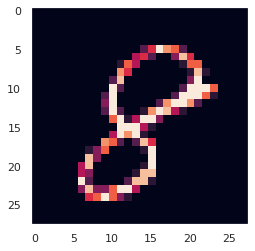

In [10]:
g = plt.imshow(X_train[0][:,:,0])

# Model Building

In [11]:
# Model Building

model = tf.keras.Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=(5,5), padding='Same', 
                       activation=tf.nn.relu, input_shape = (28,28,1)))
model.add(layers.Conv2D(filters=32, kernel_size=(5,5), padding='Same', 
                       activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))


model.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding='Same', 
                       activation=tf.nn.relu, input_shape = (28,28,1)))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding='Same', 
                       activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation=tf.nn.relu))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10,activation=tf.nn.softmax))

This code defines a Convolutional Neural Network (CNN) model using TensorFlow's Keras API for image classification tasks on the MNIST dataset. Let's break it down step by step:

### Code Explanation

1. **Model Initialization:**

   ```python
   model = tf.keras.Sequential()
   ```

   This initializes a Sequential model. A Sequential model is a linear stack of layers, meaning that you can add layers one by one in a sequential order.

2. **First Convolutional Block:**

   ```python
   model.add(layers.Conv2D(filters=32, kernel_size=(5,5), padding='Same', 
                           activation=tf.nn.relu, input_shape=(28,28,1)))
   model.add(layers.Conv2D(filters=32, kernel_size=(5,5), padding='Same', 
                           activation=tf.nn.relu))
   model.add(layers.MaxPool2D(pool_size=(2,2)))
   model.add(layers.Dropout(0.25))
   ```

   - **Conv2D Layer:** The first convolutional layer has 32 filters, each of size 5x5, and uses the ReLU activation function. `padding='Same'` means the output feature map will have the same width and height as the input.
   - **Conv2D Layer:** The second convolutional layer is similar to the first one with 32 filters and 5x5 kernel size, also using ReLU activation.
   - **MaxPool2D Layer:** A max-pooling layer with a pool size of 2x2. This reduces the spatial dimensions of the feature map by half, which helps in reducing the computational load and helps in capturing the most important features.
   - **Dropout Layer:** A dropout layer with a rate of 0.25, which means 25% of the neurons will be randomly set to zero during each training step. This helps in preventing overfitting.

3. **Second Convolutional Block:**

   ```python
   model.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding='Same', 
                           activation=tf.nn.relu))
   model.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding='Same', 
                           activation=tf.nn.relu))
   model.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
   model.add(layers.Dropout(0.25))
   ```

   - **Conv2D Layer:** The first convolutional layer in this block has 64 filters with a 3x3 kernel size and ReLU activation.
   - **Conv2D Layer:** The second convolutional layer is similar to the first one with 64 filters and 3x3 kernel size, also using ReLU activation.
   - **MaxPool2D Layer:** A max-pooling layer with a pool size of 2x2 and strides of 2x2, further reducing the spatial dimensions of the feature map.
   - **Dropout Layer:** A dropout layer with a rate of 0.25, similar to the previous dropout layer.

4. **Fully Connected Layers:**

   ```python
   model.add(layers.Flatten())
   model.add(layers.Dense(256, activation=tf.nn.relu))
   model.add(layers.Dropout(0.25))
   model.add(layers.Dense(10, activation=tf.nn.softmax))
   ```

   - **Flatten Layer:** Flattens the input, converting the 2D matrix into a 1D vector, which can be fed into a fully connected (dense) layer.
   - **Dense Layer:** A fully connected layer with 256 neurons and ReLU activation.
   - **Dropout Layer:** Another dropout layer with a rate of 0.25 to prevent overfitting.
   - **Dense Layer:** The output layer with 10 neurons (one for each class in the MNIST dataset) and softmax activation, which outputs a probability distribution over the 10 classes.

### Summary

- **Input Shape:** The input shape of the model is `(28, 28, 1)`, matching the dimensions of the MNIST images (28x28 pixels, 1 channel for grayscale).
- **Conv2D Layers:** Apply convolution operations to extract spatial features.
- **MaxPool2D Layers:** Reduce the spatial dimensions to make the computation more efficient and to capture the most important features.
- **Dropout Layers:** Help prevent overfitting by randomly setting a fraction of input units to zero during training.
- **Dense Layers:** Fully connected layers that interpret the extracted features to perform classification.
- **Softmax Output Layer:** Produces a probability distribution over the 10 classes, useful for multi-class classification tasks like MNIST.

This architecture combines convolutional layers for feature extraction and fully connected layers for classification, making it a suitable and effective CNN model for image classification tasks.

## Selecting Optimizer 

In [12]:
#Defining Optimizer

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

This code snippet defines an optimizer for training a neural network using TensorFlow's Keras API. In this case, the optimizer is RMSprop (Root Mean Square Propagation). Let's break down each component:

### Code Explanation

```python
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
```

- **`tf.keras.optimizers.RMSprop`:** This initializes an RMSprop optimizer instance. RMSprop is a popular optimization algorithm used in training neural networks. It adjusts the learning rate for each parameter based on the average of recent magnitudes of the gradients (running average of the squared gradients).

### Parameters:

1. **`learning_rate=0.001`:**
   - **Definition:** The learning rate determines the size of the steps the optimizer takes during each iteration of training.
   - **Value:** `0.001` is a common starting point for the learning rate. It controls how quickly the model learns. A smaller value makes the learning process more stable but slower, while a larger value can speed up learning but may cause instability.

2. **`rho=0.9`:**
   - **Definition:** The `rho` parameter is the decay factor used to calculate the moving average of the squared gradients.
   - **Value:** `0.9` means that the moving average of squared gradients is given a weight of `0.9`, and the remaining `0.1` comes from the current squared gradient. This helps in smoothing the gradient updates.

3. **`epsilon=1e-08`:**
   - **Definition:** The `epsilon` parameter is a small constant added to avoid division by zero during the optimization process.
   - **Value:** `1e-08` ensures numerical stability when dividing by the moving average of squared gradients.

4. **`decay=0.0`:**
   - **Definition:** The `decay` parameter is used to apply decay to the learning rate over time.
   - **Value:** `0.0` means that no decay is applied to the learning rate. If `decay` were set to a positive value, the learning rate would decrease over time according to the decay rate.

### How RMSprop Works

RMSprop is designed to overcome some of the problems of standard gradient descent and its variants, such as:

- **Adaptive Learning Rates:** RMSprop adapts the learning rate for each parameter individually based on the average of recent squared gradients. This helps in managing the learning rate more effectively for each parameter, which is particularly useful for dealing with noisy gradients and varying gradient magnitudes.
- **Stabilizes Training:** By adjusting the learning rate for each parameter, RMSprop helps stabilize the training process, especially in scenarios where gradients are sparse or have large variance.

### Context in Building a CNN Model

In the context of building and training a Convolutional Neural Network (CNN) for the MNIST dataset or any other image classification task:

- **Optimizer Choice:** RMSprop is chosen for its ability to adaptively adjust learning rates, which can be beneficial for complex models and datasets with varying gradient scales.
- **Learning Rate Management:** Proper configuration of the learning rate and other parameters is crucial for effective model training. RMSprop’s adaptive learning rates help the model converge more efficiently and potentially avoid issues like slow convergence or divergence.
- **Stability:** RMSprop's use of moving averages for gradient magnitudes helps to provide more stable updates and can lead to better performance in training deep neural networks.

By defining this optimizer, you are preparing the CNN model to use RMSprop for optimizing the weights during training, aiming for efficient and stable learning.

In [13]:
model.compile(optimizer = optimizer, loss='categorical_crossentropy', metrics=["accuracy"])

This code snippet compiles the CNN model using TensorFlow's Keras API. Compiling a model is an essential step before training, as it configures the model with the optimizer, loss function, and evaluation metrics. Let’s break down each component:

### Code Explanation

```python
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=["accuracy"])
```

- **`optimizer=optimizer`:**
  - **Definition:** This parameter specifies the optimization algorithm to be used during training. In this case, it uses the `optimizer` object defined previously, which is an instance of the RMSprop optimizer.
  - **Purpose:** The optimizer updates the model’s weights based on the gradients computed during backpropagation to minimize the loss function.

- **`loss='categorical_crossentropy'`:**
  - **Definition:** This parameter specifies the loss function to be used. `categorical_crossentropy` is a loss function suitable for multi-class classification problems where the labels are one-hot encoded.
  - **Purpose:** The loss function measures how well the model's predictions match the true labels. During training, the model aims to minimize this loss. For the MNIST dataset, where each label is one-hot encoded (i.e., a vector with a single `1` and the rest `0`), `categorical_crossentropy` is appropriate because it computes the cross-entropy loss between the true labels and predicted probabilities.

- **`metrics=["accuracy"]`:**
  - **Definition:** This parameter specifies the metrics to be evaluated during training and testing. Here, `accuracy` is used as the metric.
  - **Purpose:** Metrics are used to monitor the performance of the model. `accuracy` measures the percentage of correctly classified images out of the total number of images. During training, Keras will report the accuracy of the model on both the training and validation sets (if a validation set is provided).

### Why Compilation is Important

1. **Optimizer Configuration:** The optimizer defines how the model’s weights are updated based on the gradients. Proper configuration of the optimizer is crucial for effective training.

2. **Loss Function Selection:** The loss function quantifies the difference between the model's predictions and the true values. Choosing the appropriate loss function is essential for guiding the training process in the right direction.

3. **Metrics Monitoring:** Metrics provide insights into the model’s performance and help in understanding how well the model is learning. They are useful for tracking progress during training and for evaluating the model's performance on validation or test data.

### Context in Building a CNN Model for MNIST

In the context of building and training a CNN model for the MNIST dataset:

- **Optimizer (RMSprop):** RMSprop is chosen for its adaptive learning rate capabilities, which helps in training deep networks by adjusting learning rates for each parameter.
- **Loss Function (Categorical Cross-Entropy):** Since MNIST is a multi-class classification problem with one-hot encoded labels, categorical cross-entropy is suitable for measuring how well the model's predicted probabilities align with the true labels.
- **Metric (Accuracy):** Accuracy is a straightforward and useful metric for evaluating the performance of the model on classification tasks. It provides a clear indication of how well the model is performing in terms of correct classifications.

By compiling the model with these settings, you prepare it for training with the chosen optimizer, loss function, and evaluation metrics.

## Setting Learning Rate

In [14]:
#Setting Learning rate

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

This code sets up a callback for adjusting the learning rate during training based on the model's performance on the validation set. The callback is `ReduceLROnPlateau`, which is part of TensorFlow's Keras API. Let's break down each component:

### Code Explanation

```python
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_acc',
    patience=3,
    verbose=1,
    factor=0.5,
    min_lr=0.00001
)
```

- **`tf.keras.callbacks.ReduceLROnPlateau`:**
  - **Definition:** This callback monitors a specified metric and reduces the learning rate when the metric stops improving. It's useful for adjusting the learning rate dynamically based on the training process to help the model converge better.
  - **Purpose:** Helps in fine-tuning the learning rate to improve model performance and training efficiency, especially if the model's performance plateaus.

### Parameters

1. **`monitor='val_acc'`:**
   - **Definition:** The metric to monitor for deciding when to reduce the learning rate.
   - **Purpose:** `'val_acc'` (or `val_accuracy` in newer versions of TensorFlow) indicates that the callback will monitor the validation accuracy. When validation accuracy stops improving, the learning rate will be reduced.
   - **Note:** Depending on the TensorFlow/Keras version, the metric might be `'val_accuracy'` rather than `'val_acc'`.

2. **`patience=3`:**
   - **Definition:** The number of epochs with no improvement after which the learning rate will be reduced.
   - **Purpose:** If the validation accuracy does not improve for 3 consecutive epochs, the learning rate will be reduced. This helps to prevent premature learning rate adjustments and ensures that the model has enough epochs to show improvement before reducing the learning rate.

3. **`verbose=1`:**
   - **Definition:** Controls the verbosity mode. `verbose=1` means that the callback will print messages when the learning rate is reduced.
   - **Purpose:** Provides feedback during training about when and how the learning rate is adjusted, which can be useful for monitoring the training process.

4. **`factor=0.5`:**
   - **Definition:** The factor by which the learning rate will be reduced.
   - **Purpose:** When the learning rate is reduced, it will be multiplied by 0.5. For example, if the current learning rate is 0.001, it will be reduced to 0.0005.

5. **`min_lr=0.00001`:**
   - **Definition:** The minimum learning rate allowed.
   - **Purpose:** Ensures that the learning rate does not fall below 0.00001, which prevents the learning rate from becoming too small and potentially causing training to stall.

### Why ReduceLROnPlateau is Useful

- **Dynamic Adjustment:** It allows the learning rate to be adjusted based on the model's performance during training, rather than using a fixed learning rate. This can help in achieving better convergence and avoiding overshooting minima.
- **Improved Performance:** Reducing the learning rate when the model's performance plateaus can help in fine-tuning the model and improving its final performance.
- **Training Efficiency:** Helps in making the most out of the available training epochs by dynamically adjusting the learning rate to ensure continued progress.

### Context in Building a CNN Model for MNIST

In the context of training a CNN model for the MNIST dataset:

- **Monitoring Validation Accuracy:** By monitoring validation accuracy, you ensure that the learning rate is adjusted based on how well the model generalizes to unseen data, rather than just fitting to the training data.
- **Adaptive Learning Rate:** This callback helps in adapting the learning rate to the training dynamics, which can be particularly useful if the model's performance improvement slows down during training.
- **Preventing Overfitting:** Dynamic adjustment of the learning rate can also help in reducing overfitting by allowing the model to continue learning effectively even when the performance on the validation set plateaus.

By setting up this callback, you enhance the training process of your CNN model, allowing it to adaptively adjust the learning rate for potentially better training outcomes.

In [15]:
epochs= 15
batch_size = 128

# Model Fitting

In [16]:
model1 = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False, 
        zca_whitening=False, 
        rotation_range=10,  
        zoom_range = 0.1,
        width_shift_range=0.1, 
        height_shift_range=0.1,  
        horizontal_flip=False, 
        vertical_flip=False)  

model1.fit(X_train)

This code snippet sets up an `ImageDataGenerator` for data augmentation and then attempts to fit a model using this generator. Let's break it down in detail:

### Code Explanation

#### ImageDataGenerator Configuration

```python
model1 = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images horizontally
    vertical_flip=False)  # randomly flip images vertically
```

- **`ImageDataGenerator`:** This is a Keras utility that allows you to generate batches of tensor image data with real-time data augmentation. This is useful for improving model generalization by creating variations of the training data.

##### Parameters:

1. **`featurewise_center=False`:**
   - **Definition:** When `True`, it subtracts the mean of the dataset from each image, making the average pixel value 0.
   - **Purpose:** Helps in normalizing the input data, but here it is turned off.

2. **`samplewise_center=False`:**
   - **Definition:** When `True`, it subtracts the mean of each image from itself, making the mean of each image 0.
   - **Purpose:** Normalizes each sample individually, but here it is turned off.

3. **`featurewise_std_normalization=False`:**
   - **Definition:** When `True`, it divides each image by the standard deviation of the dataset.
   - **Purpose:** Normalizes the dataset by scaling the features, but it is turned off here.

4. **`samplewise_std_normalization=False`:**
   - **Definition:** When `True`, it divides each image by its own standard deviation.
   - **Purpose:** Scales each sample individually, but it is turned off.

5. **`zca_whitening=False`:**
   - **Definition:** When `True`, it applies ZCA (Zero Component Analysis) whitening to the images.
   - **Purpose:** Helps in decorrelating and normalizing the input features, but it is turned off.

6. **`rotation_range=10`:**
   - **Definition:** Specifies the range (in degrees) for random rotations.
   - **Purpose:** Randomly rotates images by up to 10 degrees to make the model invariant to small rotations.

7. **`zoom_range=0.1`:**
   - **Definition:** Specifies the range for random zoom.
   - **Purpose:** Randomly zooms in or out of the image by up to 10% to improve robustness to zoom variations.

8. **`width_shift_range=0.1`:**
   - **Definition:** Specifies the range for random horizontal shifts.
   - **Purpose:** Randomly shifts images horizontally by up to 10% of the width to enhance model generalization.

9. **`height_shift_range=0.1`:**
   - **Definition:** Specifies the range for random vertical shifts.
   - **Purpose:** Randomly shifts images vertically by up to 10% of the height to improve robustness to vertical shifts.

10. **`horizontal_flip=False`:**
    - **Definition:** When `True`, it randomly flips images horizontally.
    - **Purpose:** Helps in learning invariance to horizontal flipping, but it is turned off here.

11. **`vertical_flip=False`:**
    - **Definition:** When `True`, it randomly flips images vertically.
    - **Purpose:** Helps in learning invariance to vertical flipping, but it is turned off.

#### Fitting the Model

```python
model1.fit(X_train)
```

- **`model1.fit(X_train)`:** This line is meant to fit the model (which is actually an `ImageDataGenerator`) on the data `X_train`.

### Important Notes

- **Correct Usage:** `ImageDataGenerator` is typically used with methods like `flow()` or `flow_from_directory()` to generate batches of augmented images. It does not have a `fit()` method itself. Instead, it should be used with a model’s `fit()` method like this:

   ```python
   model.fit(model1.flow(X_train, Y_train), epochs=num_epochs)
   ```

   Here, `model1.flow(X_train, Y_train)` generates batches of augmented images and their corresponding labels for training.

- **Purpose of Data Augmentation:** The `ImageDataGenerator` is used to augment the training data in real-time during the training process. This helps in improving the model's ability to generalize by exposing it to variations of the training data.

### Summary

- **Data Augmentation:** `ImageDataGenerator` is configured to perform various augmentations such as rotation, zoom, and shifting to enrich the training dataset.
- **Normalization and Whitening:** These features are turned off in this setup, meaning no normalization or whitening is applied.
- **Model Training:** `ImageDataGenerator` is used for data augmentation, but it should be correctly integrated with the `fit` method of a Keras model to be effective.

Ensure to integrate `ImageDataGenerator` properly with your model training process to leverage data augmentation effectively.

In [17]:
# Fit the model
history = model.fit_generator(model1.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size,
                              callbacks=[learning_rate_reduction])

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
295/295 - 85s - loss: 0.4251 - accuracy: 0.8654 - val_loss: 0.0723 - val_accuracy: 0.9779
Epoch 2/15
295/295 - 84s - loss: 0.1144 - accuracy: 0.9650 - val_loss: 0.0514 - val_accuracy: 0.9857
Epoch 3/15
295/295 - 83s - loss: 0.0799 - accuracy: 0.9753 - val_loss: 0.0317 - val_accuracy: 0.9898
Epoch 4/15
295/295 - 84s - loss: 0.0662 - accuracy: 0.9799 - val_loss: 0.0354 - val_accuracy: 0.9900
Epoch 5/15
295/295 - 85s - loss: 0.0576 - accuracy: 0.9824 - val_loss: 0.0340 - val_accuracy: 0.9886
Epoch 6/15
295/295 - 84s - loss: 0.0532 - accuracy: 0.9839 - val_loss: 0.0264 - val_accuracy: 0.9907
Epoch 7/15
295/295 - 84s - loss: 0.0481 - accuracy: 0.9854 - val_loss: 0.0263 - val_accuracy: 0.9921
Epoch 8/15
295/295 - 84s - loss: 0.0480 - accuracy: 0.9857 - val_loss: 0.0220 - val_accuracy: 0.9924
Epoch 9/15
295/295 - 83s - loss: 0.0450 - accuracy: 0.9866 - val_loss: 0.0206 - val_accuracy: 0.9940
Epoch 10/15
295/295 - 83s - loss: 0.0427 - accuracy: 0.9871 - val_loss: 0.0202 - val_accura

This code snippet is used to train a Keras model with data augmentation using the `ImageDataGenerator`. It employs `model.fit_generator` to fit the model on augmented data generated by the `ImageDataGenerator`. Here’s a detailed explanation of each component of this code:

### Code Explanation

```python
history = model.fit_generator(
    model1.flow(X_train, Y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(X_val, Y_val),
    verbose=2,
    steps_per_epoch=X_train.shape[0] // batch_size,
    callbacks=[learning_rate_reduction]
)
```

#### Parameters and Components

1. **`model.fit_generator(...)`**:
   - **Definition:** `fit_generator` is used to train the model on data generated batch-by-batch by a Python generator or a `tf.keras.utils.ImageDataGenerator` instance. Note that `fit_generator` is deprecated in favor of `model.fit` in newer versions of TensorFlow/Keras, but it’s still useful in older versions.
   - **Purpose:** It allows for training on data that is generated in real-time, which is especially useful for data augmentation.

2. **`model1.flow(X_train, Y_train, batch_size=batch_size)`**:
   - **Definition:** `model1.flow(...)` is a method of the `ImageDataGenerator` that generates batches of augmented data.
   - **Purpose:** It takes the training data `X_train` and labels `Y_train`, and generates augmented batches of data with the specified `batch_size`. The generator produces batches of data in real-time with the augmentations specified in the `ImageDataGenerator`.

3. **`epochs=epochs`**:
   - **Definition:** The number of epochs to train the model.
   - **Purpose:** It specifies how many times the entire training dataset will be passed through the model during training.

4. **`validation_data=(X_val, Y_val)`**:
   - **Definition:** Tuple of validation data and labels.
   - **Purpose:** This data is used to evaluate the model's performance on unseen data after each epoch. It helps in monitoring the model’s ability to generalize.

5. **`verbose=2`**:
   - **Definition:** Controls the verbosity of the output during training.
   - **Purpose:** `verbose=2` provides a more detailed output, showing progress of training for each epoch.

6. **`steps_per_epoch=X_train.shape[0] // batch_size`**:
   - **Definition:** Number of steps (batches) to draw from the generator for each epoch.
   - **Purpose:** It determines how many batches the model should process before declaring an epoch finished. It’s calculated by dividing the number of training samples by the batch size. This ensures that each epoch processes the entire training dataset.

7. **`callbacks=[learning_rate_reduction]`**:
   - **Definition:** A list of callback functions to apply during training.
   - **Purpose:** `learning_rate_reduction` is an instance of `ReduceLROnPlateau`, which dynamically adjusts the learning rate based on the performance of the model. This callback helps in fine-tuning the learning rate to improve convergence.

### Summary of Training Process

- **Data Generation:** `model1.flow(X_train, Y_train, batch_size=batch_size)` generates batches of augmented training data in real-time. This helps in enhancing model generalization by exposing it to various transformations of the training data.
  
- **Epochs and Steps:** The model trains for a specified number of epochs. During each epoch, it processes `X_train.shape[0] // batch_size` batches of data.

- **Validation:** After each epoch, the model’s performance is evaluated on the validation set `(X_val, Y_val)`.

- **Callbacks:** The `learning_rate_reduction` callback is used to adjust the learning rate dynamically if the validation accuracy plateaus.

- **Verbose Output:** `verbose=2` provides detailed logs about the training progress.

### Important Notes

- **Deprecation:** In newer versions of TensorFlow/Keras, `fit_generator` has been replaced by `fit`, which can also accept data generators directly.

- **Integration:** Ensure that `model1` is correctly set up as an `ImageDataGenerator` and that `batch_size` and `epochs` are properly defined variables.

By using this setup, you effectively train your model with augmented data and dynamically adjust the learning rate to enhance training efficiency and performance.


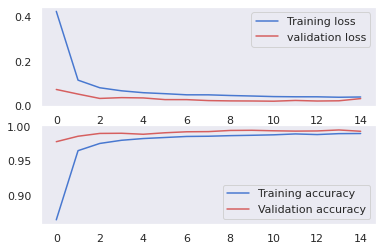

In [18]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best')

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best')

This code snippet is used to visualize the training and validation performance of a machine learning model by plotting the loss and accuracy curves. It leverages Matplotlib, a popular Python library for plotting, to create two subplots that display these metrics over the training epochs. Here’s a detailed breakdown of each component:

### Code Explanation

```python
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss")
legend = ax[0].legend(loc='best')

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r', label="Validation accuracy")
legend = ax[1].legend(loc='best')
```

#### Components:

1. **`fig, ax = plt.subplots(2, 1)`**:
   - **Definition:** Creates a figure and a set of subplots. In this case, `plt.subplots(2, 1)` creates a figure with 2 subplots arranged vertically (2 rows, 1 column).
   - **Purpose:** Sets up the plotting area where the loss and accuracy curves will be drawn. `fig` represents the entire figure, and `ax` is an array containing the two subplot axes.

2. **`ax[0].plot(history.history['loss'], color='b', label="Training loss")`**:
   - **Definition:** Plots the training loss values on the first subplot (`ax[0]`).
   - **Purpose:** Displays how the training loss changes over epochs. The `color='b'` argument sets the line color to blue, and `label="Training loss"` adds a label for the legend.

3. **`ax[0].plot(history.history['val_loss'], color='r', label="Validation loss")`**:
   - **Definition:** Plots the validation loss values on the first subplot (`ax[0]`).
   - **Purpose:** Displays how the validation loss changes over epochs. The `color='r'` argument sets the line color to red, and `label="Validation loss"` adds a label for the legend.

4. **`legend = ax[0].legend(loc='best')`**:
   - **Definition:** Adds a legend to the first subplot (`ax[0]`).
   - **Purpose:** `loc='best'` automatically places the legend in the best location on the plot to avoid overlapping with the plotted lines.

5. **`ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")`**:
   - **Definition:** Plots the training accuracy values on the second subplot (`ax[1]`).
   - **Purpose:** Shows how the training accuracy changes over epochs. The `color='b'` argument sets the line color to blue, and `label="Training accuracy"` adds a label for the legend.

6. **`ax[1].plot(history.history['val_accuracy'], color='r', label="Validation accuracy")`**:
   - **Definition:** Plots the validation accuracy values on the second subplot (`ax[1]`).
   - **Purpose:** Displays how the validation accuracy changes over epochs. The `color='r'` argument sets the line color to red, and `label="Validation accuracy"` adds a label for the legend.

7. **`legend = ax[1].legend(loc='best')`**:
   - **Definition:** Adds a legend to the second subplot (`ax[1]`).
   - **Purpose:** `loc='best'` automatically places the legend in the best location on the plot to avoid overlapping with the plotted lines.

### Summary

- **Visualization Purpose:** This code creates visualizations of how the training and validation loss and accuracy change over the course of training epochs. This helps in diagnosing how well the model is learning and generalizing.
  
- **Training Loss vs. Validation Loss:** Plotting both allows you to see if the model is overfitting (i.e., if the training loss decreases while validation loss increases).

- **Training Accuracy vs. Validation Accuracy:** Similarly, plotting both training and validation accuracy helps in understanding the model’s performance and generalization ability.

- **Plot Arrangement:** Using `plt.subplots(2, 1)` creates two vertical plots, one for loss and one for accuracy, to easily compare the metrics.

### Visualization Insights

- **Overfitting or Underfitting:** You can observe if the training loss decreases but validation loss starts increasing (overfitting) or if both losses are high (underfitting).

- **Learning Progress:** The accuracy curves show how well the model improves its performance over time. Smooth and increasing curves generally indicate good learning.

By plotting these metrics, you can gain valuable insights into the training dynamics of your model and make informed decisions for further adjustments in model architecture or training parameters.

# Result Prediction

In [19]:
# predict results
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

This code snippet performs predictions using a trained machine learning model, processes the predicted results, and formats them into a suitable format for further use or submission. Let’s break down each part of the code:

### Code Explanation

```python
# predict results
results = model.predict(test)

# select the index with the maximum probability
results = np.argmax(results, axis=1)

results = pd.Series(results, name="Label")
```

#### Detailed Breakdown

1. **`results = model.predict(test)`**:
   - **Definition:** `model.predict(test)` generates predictions for the input data `test` using the trained model.
   - **Purpose:** The `predict` method outputs the model’s predicted probabilities for each class for the given input data. For classification tasks, this will typically return a 2D array where each row corresponds to a sample and each column corresponds to the probability of that sample belonging to a particular class.

2. **`results = np.argmax(results, axis=1)`**:
   - **Definition:** `np.argmax(results, axis=1)` finds the index of the maximum value along the specified axis (axis=1 in this case).
   - **Purpose:** For each row in the `results` array (which represents each sample), `np.argmax` returns the index of the class with the highest probability. This converts the probability distributions into class predictions. For example, if the model predicts probabilities `[0.1, 0.3, 0.6]` for a sample, `np.argmax` will return `2`, indicating that class 2 has the highest probability.

3. **`results = pd.Series(results, name="Label")`**:
   - **Definition:** `pd.Series(results, name="Label")` converts the numpy array of predicted class indices into a pandas Series object and names it "Label".
   - **Purpose:** Converting the predictions into a pandas Series makes it easier to handle and analyze the results, especially if you need to save or manipulate them further. Naming the Series "Label" is useful for clarity, especially if you are preparing data for a DataFrame or for submission where the column name "Label" is expected.

### Summary

- **Model Prediction:** The model predicts probabilities for each class for the input data.
- **Class Prediction:** `np.argmax` is used to convert these probabilities into class labels by selecting the index of the maximum probability.
- **Format Results:** The predictions are then converted into a pandas Series, which is a common format for data manipulation and analysis in Python.

### Example Use Case

- **In a Classification Task:** For a dataset like MNIST (handwritten digit classification), where you have 10 classes (digits 0 through 9), this code will produce class labels for each test image based on the model’s predictions.
- **Preparing Submission:** If you are preparing results for submission in a competition or for evaluation, converting predictions into a pandas Series with a name like "Label" can be useful for exporting to a CSV file or for further analysis.

This code snippet effectively bridges the gap between raw model predictions and a user-friendly format that can be easily interpreted or submitted.

# Submission

In [20]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("submission.csv",index=False)

This code snippet is used to prepare and save the final predictions of a model to a CSV file, typically for submission in machine learning competitions or evaluations. It combines the predicted labels with a unique identifier for each image and then exports the results to a CSV file. Here’s a detailed breakdown of each part:

### Code Explanation

```python
submission = pd.concat([pd.Series(range(1, 28001), name="ImageId"), results], axis=1)

submission.to_csv("mnist.csv", index=False)
```

#### Detailed Breakdown

1. **`pd.Series(range(1, 28001), name="ImageId")`**:
   - **Definition:** `pd.Series` creates a pandas Series from the given data. `range(1, 28001)` generates a sequence of numbers from 1 to 28000 (inclusive), and `name="ImageId"` names the Series as "ImageId".
   - **Purpose:** This Series acts as a unique identifier for each image in the test set. It’s used to create a column in the final DataFrame that indicates which image each prediction corresponds to.

2. **`pd.concat([pd.Series(range(1, 28001), name="ImageId"), results], axis=1)`**:
   - **Definition:** `pd.concat` concatenates two or more pandas objects along a specified axis. Here, it concatenates the Series of image IDs with the `results` Series (which contains the predicted labels).
   - **Parameters:**
     - **`[pd.Series(range(1, 28001), name="ImageId"), results]`:** List of objects to concatenate. The first object is the Series of image IDs, and the second is the Series of predicted labels.
     - **`axis=1`:** Specifies that concatenation should occur along the columns (horizontally).
   - **Purpose:** This creates a DataFrame where the first column is "ImageId" and the second column contains the predicted labels. The `axis=1` argument ensures that the Series are concatenated side by side.

3. **`submission.to_csv("mnist.csv", index=False)`**:
   - **Definition:** `to_csv` writes the DataFrame `submission` to a CSV file.
   - **Parameters:**
     - **`"mnist.csv"`:** The name of the file to which the DataFrame is saved.
     - **`index=False`:** Ensures that the DataFrame’s index is not included in the CSV file. Only the columns "ImageId" and the predicted labels will be written to the file.
   - **Purpose:** Saves the DataFrame as a CSV file named "mnist.csv". This file can be used for submission in competitions, for further analysis, or for sharing results.

### Summary

- **Creating Identifiers:** A Series of image IDs is created to uniquely identify each test sample.
- **Combining Results:** The image IDs and the predicted labels are combined into a single DataFrame.
- **Saving Results:** The DataFrame is saved to a CSV file, which is a common format for storing and sharing data.

### Example Use Case

- **Competition Submission:** In a competition like Kaggle’s MNIST digit classification challenge, submissions usually require a CSV file where each row corresponds to an image ID and its predicted label. This code prepares that file.
- **Evaluation:** The CSV file can be used to evaluate model performance on a test set by comparing predictions against ground truth labels.

By using this code, you ensure that your model’s predictions are formatted correctly and saved in a way that’s easy to use for evaluations or submissions.

Thank You for Visiting!

Thank you so much for taking the time to visit my Kaggle notebook! I hope you found the analysis informative and helpful. Your interest and support mean a lot to me.

If you have any questions, suggestions, or feedback, please feel free to leave a comment or reach out to me. Your input is invaluable in helping me improve and grow as a data scientist.

Once again, thank you for stopping by! Wishing you all the best in your data science journey.

Best regards,

Akanksha